In [1]:
import habitat
import os
import sys
import shutil

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

import habitat
from habitat.tasks.nav.shortest_path_follower import ShortestPathFollower
from habitat.utils.visualizations import maps

In [2]:
class SimpleRLEnv(habitat.RLEnv):
    def get_reward_range(self):
        return [-1, 1]

    def get_reward(self, observations):
        return 0

    def get_done(self, observations):
        return self.habitat_env.episode_over

    def get_info(self, observations):
        return self.habitat_env.get_metrics()

In [3]:
def plot_point(episode, point):
    
    top_down_map = maps.get_topdown_map(env._env.sim)
    
    MAP_THICKNESS_SCALAR = 1250
    if point == 'start':
        s_x, s_y = maps.to_grid(
        episode.start_position[0],
        episode.start_position[2],
        maps.COORDINATE_MIN,
        maps.COORDINATE_MAX,
        (1250, 1250),
        )
        point_padding = 1 * int(
            np.ceil(top_down_map.shape[0] / MAP_THICKNESS_SCALAR)
        )
#         print("COORDINATES RANGE:", maps.COORDINATE_MIN, maps.COORDINATE_MAX)
#         print("MAP_RESOLUTION:", 1250)
#         print("SOURCE POSITION REAL WORLD:", episode.start_position[0], episode.start_position[2])
#         print("SOURCE POSITION GRID WORLD:", s_x, s_y)
        
#         print("PADDING", point_padding)
        
        top_down_map[
            s_x - point_padding : s_x + point_padding + 1,
            s_y - point_padding : s_y + point_padding + 1,
        ] = maps.MAP_SOURCE_POINT_INDICATOR

    if point == 'end':
        t_x, t_y = maps.to_grid(
            episode.goals[0].position[0],
            episode.goals[0].position[2],
            maps.COORDINATE_MIN,
            maps.COORDINATE_MAX,
            (1250, 1250),
        )
        point_padding = 1 * int(
            np.ceil(top_down_map.shape[0] / MAP_THICKNESS_SCALAR)
        )
#         print("TARGET POSITION REAL WORLD:", episode.goals[0].position[0], episode.goals[0].position[2])
#         print("TARGET POSITION:", t_x, t_y)
        top_down_map[
            t_x - point_padding : t_x + point_padding + 1,
            t_y - point_padding : t_y + point_padding + 1,
        ] = maps.MAP_TARGET_POINT_INDICATOR
    
    return top_down_map

2019-07-10 14:13:10,793 initializing sim Sim-v0
I0710 14:13:10.801290 39408 simulator.py:78] Loaded navmesh /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/2azQ1b91cZZ/2azQ1b91cZZ.navmesh
2019-07-10 14:13:22,292 initializing task Nav-v0


SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/2azQ1b91cZZ/2azQ1b91cZZ.glb 32.17621612548828 1.034767508506775 0.12711000442504883
(345, 202) (346, 202)
SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/2azQ1b91cZZ/2azQ1b91cZZ.glb 22.323274612426758 -11.018304824829102 0.12711000442504883
(345, 202) (345, 203)


I0710 14:24:03.787607 39408 simulator.py:78] Loaded navmesh /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/X7HyMhZNoso/X7HyMhZNoso.navmesh


SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/X7HyMhZNoso/X7HyMhZNoso.glb 2.6654176712036133 20.751497268676758 -0.535740852355957
(99, 181) (99, 146)
SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/X7HyMhZNoso/X7HyMhZNoso.glb -3.474987030029297 21.391277313232422 -0.535740852355957
(99, 181) (99, 146)
SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/X7HyMhZNoso/X7HyMhZNoso.glb 2.2459616661071777 17.5167179107666 -0.535740852355957
(99, 181) (99, 146)
SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/X7HyMhZNoso/X7HyMhZNoso.glb -0.6172269582748413 14.29007339477539 -0.535740852355957
(99, 181) (99, 146)
SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/X7HyMhZNoso/X7HyMhZNoso.glb 0.41697317361831665 21.173795700073242 -0.535740852355957
(99, 181) (99, 146)
S

SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/X7HyMhZNoso/X7HyMhZNoso.glb 0.01664823293685913 19.33062744140625 -0.535740852355957
(99, 181) (99, 146)
SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/X7HyMhZNoso/X7HyMhZNoso.glb -1.7071011066436768 17.199710845947266 -0.535740852355957
(99, 181) (99, 146)
SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/X7HyMhZNoso/X7HyMhZNoso.glb 1.2770627737045288 20.098567962646484 -0.535740852355957
(99, 181) (99, 146)
SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/X7HyMhZNoso/X7HyMhZNoso.glb -0.33398333191871643 12.321978569030762 -0.535740852355957
(99, 181) (99, 146)
SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/X7HyMhZNoso/X7HyMhZNoso.glb -2.4809682369232178 16.70985221862793 -0.535740852355957
(99, 181) (99, 14

SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/X7HyMhZNoso/X7HyMhZNoso.glb 4.198368072509766 10.648810386657715 -0.6738017797470093
(99, 181) (99, 182)
SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/X7HyMhZNoso/X7HyMhZNoso.glb 2.435365676879883 14.560104370117188 -0.535740852355957
(99, 181) (99, 146)
SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/X7HyMhZNoso/X7HyMhZNoso.glb 1.4414091110229492 20.81354331970215 -0.535740852355957
(99, 181) (99, 146)
SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/X7HyMhZNoso/X7HyMhZNoso.glb 0.4289918541908264 19.87164878845215 -0.535740852355957
(99, 181) (99, 146)
SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/X7HyMhZNoso/X7HyMhZNoso.glb 4.465826511383057 9.054778099060059 -0.5391829013824463
(99, 181) (99, 146)
SCEN

I0710 14:29:28.429136 39408 simulator.py:78] Loaded navmesh /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/oLBMNvg9in8/oLBMNvg9in8.navmesh


SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/X7HyMhZNoso/X7HyMhZNoso.glb -5.068558692932129 13.319031715393066 -0.535740852355957
(99, 181) (99, 146)
SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/oLBMNvg9in8/oLBMNvg9in8.glb 5.549565315246582 -1.6659752130508423 -2.1900038719177246
(73, 83) (74, 83)
SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/oLBMNvg9in8/oLBMNvg9in8.glb 5.555750846862793 -1.887007474899292 -2.1900038719177246
(73, 83) (74, 83)


I0710 14:33:48.830781 39408 simulator.py:78] Loaded navmesh /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/zsNo4HB9uLZ/zsNo4HB9uLZ.navmesh


SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/zsNo4HB9uLZ/zsNo4HB9uLZ.glb 8.052766799926758 -7.756375789642334 0.17162801325321198
(179, 102) (179, 103)
SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/zsNo4HB9uLZ/zsNo4HB9uLZ.glb 11.482635498046875 -7.8146209716796875 0.17162801325321198
(179, 102) (179, 103)


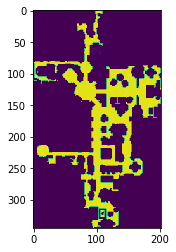

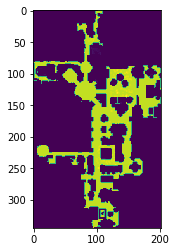

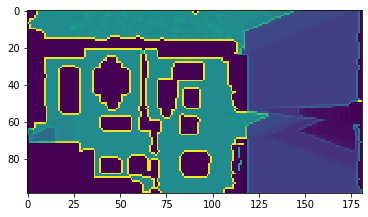

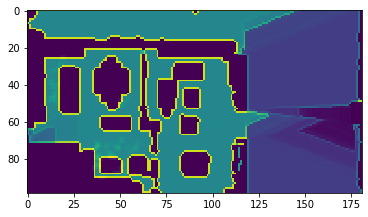

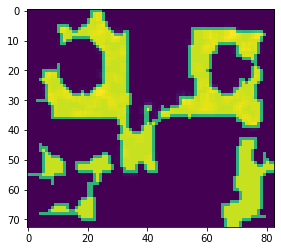

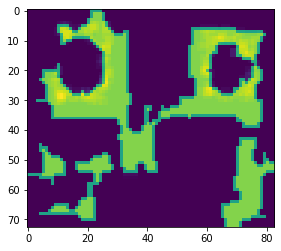

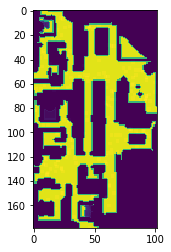

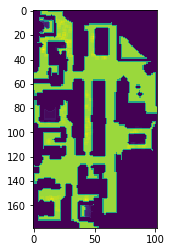

2019-07-10 14:38:48,585 initializing sim Sim-v0
I0710 14:38:48.590873 39408 simulator.py:78] Loaded navmesh /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/17DRP5sb8fy/17DRP5sb8fy.navmesh
2019-07-10 14:38:50,722 initializing task Nav-v0


SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/17DRP5sb8fy/17DRP5sb8fy.glb 0.6681305766105652 -4.970120906829834 0.07244700193405151
(123, 63) (123, 64)
SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/17DRP5sb8fy/17DRP5sb8fy.glb -1.1858166456222534 -5.007080078125 0.07244700193405151
(123, 63) (123, 64)
SCENE:  /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/17DRP5sb8fy/17DRP5sb8fy.glb 0.4083267152309418 -4.922001838684082 0.07244700193405151
(123, 63) (123, 64)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/private/home/medhini/anaconda3/envs/habitat/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3296, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-6264f9485751>", line 20, in <module>
    observations = env.reset()
  File "/private/home/medhini/navigation-analysis-habitat/habitat-api/habitat/core/env.py", line 299, in reset
    return self._env.reset()
  File "/private/home/medhini/navigation-analysis-habitat/habitat-api/habitat/core/env.py", line 195, in reset
    self._task.measurements.reset_measures(episode=self.current_episode)
  File "/private/home/medhini/navigation-analysis-habitat/habitat-api/habitat/core/embodied_task.py", line 92, in reset_measures
    measure.reset_metric(*args, **kwargs)
  File "/private/home/medhini/navigation-analysis-habitat/habitat-api/habitat/tasks/nav/nav_task.py", line 643, in reset_metric
    self._top_down_map = self.get_original_map(episode)


KeyboardInterrupt: 

In [4]:
splits = ['val', 'train', 'test']
episode_counts = {'val':200,'train':93750,'test':50}
data_path = '../data/datasets/roomnav/mp3d/v1/{split}/{split}.json.gz'

for split in splits:
    config = habitat.get_config(config_paths="tasks/roomnav_mp3d.yaml")
    config.defrost()
    config.DATASET.DATA_PATH = data_path.format(split=split)
    config.DATASET.SCENES_DIR = '../data/scene_datasets/'
    config.TASK.MEASUREMENTS.append("TOP_DOWN_MAP")
    config.freeze()
    
    env = SimpleRLEnv(config=config)
    
    start_map = {}
    end_map = {}
    
    for i in range(len(env.episodes)):
        
        observations = env.reset()
        
        start_top_down_map = plot_point(env.current_episode, 'start')
        
        range_x = np.where(np.any(start_top_down_map, axis=1))[0]
        range_y = np.where(np.any(start_top_down_map, axis=0))[0]

        x_min = range_x[0]
        x_max = range_x[-1]
        y_min = range_y[0]
        y_max = range_y[-1]

        start_top_down_map = start_top_down_map[x_min:x_max, y_min:y_max]

        end_top_down_map = plot_point(env.current_episode, 'end')
        end_top_down_map = end_top_down_map[x_min:x_max, y_min:y_max]
        
        this_scene = env.current_episode.scene_id.strip().split('/')[-1]
        
        if this_scene not in start_map.keys():
            start_map[this_scene] = start_top_down_map
            end_map[this_scene] = end_top_down_map
        else:
            try:
                start_map[this_scene] += start_top_down_map
                end_map[this_scene] += end_top_down_map
            except:
                print("SCENE: ", env.current_episode.scene_id, env.current_episode.start_position[0], env.current_episode.start_position[2], env.current_episode.start_position[1])
                print(start_map[this_scene].shape, start_top_down_map.shape)
                continue
                
            
    for key,mp in start_map.items():
        start_mp = start_map[key]/100
        end_mp = end_map[key]/100
        
        plt.imshow(start_mp)
        plt.show()
        
        plt.imshow(end_mp)
        plt.show()
    
    env.close()

In [4]:

data_path = '../data/datasets/roomnav/mp3d/v1/{split}/{split}.json.gz'

# start_map = None
# end_map = None

config = habitat.get_config(config_paths="tasks/roomnav_mp3d.yaml")
config.defrost()
config.DATASET.DATA_PATH = data_path.format(split='val')
config.DATASET.SCENES_DIR = '../data/scene_datasets/'
config.TASK.MEASUREMENTS.append("TOP_DOWN_MAP")
config.freeze()

env = SimpleRLEnv(config=config)

observations = env.reset()
print(len(env.episodes))

print(dir(env.current_episode))

2019-07-03 19:31:48,225 initializing sim Sim-v0
I0703 19:31:48.229898 73316 simulator.py:78] Loaded navmesh /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/2azQ1b91cZZ/2azQ1b91cZZ.navmesh
2019-07-03 19:31:59,757 initializing task Nav-v0


300
['__annotations__', '__attrs_attrs__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'episode_id', 'goals', 'info', 'scene_id', 'shortest_paths', 'start_position', 'start_room', 'start_rotation']


In [5]:
print(env.current_episode.info)

{'geodesic_distance': 35.69606399536133}


In [7]:
print(env.current_episode.start_position, env.current_episode.goals[0])

[0.5976877212524414, 0.12711000442504883, 5.558842658996582] RoomGoal(position=[19.30671501159668, 0.12711000442504883, -9.629144668579102], radius=0.2, room_aabb=[17.837299346923828, -11.683799743652344, 22.730300903320312, -6.100349426269531], room_name='bedroom')


In [ ]:
# observations = env.reset()

# observations, reward, done, info = env.step(1)

scene_count = 0
this_scene = env.current_episode.scene_id.strip().split('/')[-1]

start_top_down_map = plot_point(env.current_episode, 'start')
# start_top_down_map = maps.get_topdown_map(env._env.sim, map_resolution=(5000,5000))
# plt.imshow(start_top_down_map)
# plt.show()

range_x = np.where(np.any(start_top_down_map, axis=1))[0]
range_y = np.where(np.any(start_top_down_map, axis=0))[0]

grid_delta = 0
x_min = range_x[0] - grid_delta
x_max = range_x[-1] + grid_delta
y_min = range_y[0] - grid_delta
y_max = range_y[-1] + grid_delta

print("x_min:", x_min)
print("x_max:", x_max)
print("y_min:", y_min)
print("y_max:", y_max)

start_top_down_map = start_top_down_map[x_min:x_max, y_min:y_max]
# start_colored_map = maps.colorize_topdown_map(start_top_down_map)
plt.imshow(start_top_down_map)
plt.show()

end_top_down_map = plot_point(env.current_episode, 'end')

# end_top_down_map = maps.get_topdown_map(env._env.sim, map_resolution=(5000,5000))
# plt.imshow(end_top_down_map)
# plt.show()
range_x = np.where(np.any(end_top_down_map, axis=1))[0]
range_y = np.where(np.any(end_top_down_map, axis=0))[0]

x_min = range_x[0]
x_max = range_x[-1]
y_min = range_y[0]
y_max = range_y[-1]

end_top_down_map = end_top_down_map[x_min:x_max, y_min:y_max]

plt.imshow(end_top_down_map)
plt.show()

print("SCENE:",env.episodes[0].scene_id.strip().split('/')[-1])

# observations = env.reset()

# observations, reward, done, info = env.step(1)

scene_count = 0
this_scene = env.episodes[0].scene_id.strip().split('/')[-1]

start_top_down_map = plot_point(env.current_episode, 'start')

range_x = np.where(np.any(start_top_down_map, axis=1))[0]
range_y = np.where(np.any(start_top_down_map, axis=0))[0]

grid_delta = 0
x_min = range_x[0] - grid_delta
x_max = range_x[-1] + grid_delta
y_min = range_y[0] - grid_delta
y_max = range_y[-1] + grid_delta

print("x_min:", x_min)
print("x_max:", x_max)
print("y_min:", y_min)
print("y_max:", y_max)

start_top_down_map = start_top_down_map[x_min:x_max, y_min:y_max]
plt.imshow(start_top_down_map)
plt.show()

end_top_down_map = plot_point(env.episodes[1], 'end')

range_x = np.where(np.any(end_top_down_map, axis=1))[0]
range_y = np.where(np.any(end_top_down_map, axis=0))[0]

x_min = range_x[0]
x_max = range_x[-1]
y_min = range_y[0]
y_max = range_y[-1]

end_top_down_map = end_top_down_map[x_min:x_max, y_min:y_max]

plt.imshow(end_top_down_map)
plt.show()

print("SCENE:",env.episodes[1].scene_id.strip().split('/')[-1])

In [1]:
import os
import shutil

from PIL import Image
import numpy as np

import habitat
from habitat.tasks.nav.shortest_path_follower import ShortestPathFollower
from habitat.utils.visualizations import maps

class SimpleRLEnv(habitat.RLEnv):
    def get_reward_range(self):
        return [-1, 1]

    def get_reward(self, observations):
        return 0

    def get_done(self, observations):
        return self.habitat_env.episode_over

    def get_info(self, observations):
        return self.habitat_env.get_metrics()
    
def draw_top_down_map(info, heading, output_size):
    top_down_map = maps.colorize_topdown_map(info["top_down_map"]["map"])
    original_map_size = top_down_map.shape[:2]
    map_scale = np.array(
        (1, original_map_size[1] * 1.0 / original_map_size[0])
    )
    new_map_size = np.round(output_size * map_scale).astype(np.int32)
    # OpenCV expects w, h but map size is in h, w
    top_down_map = cv2.resize(top_down_map, (new_map_size[1], new_map_size[0]))

    map_agent_pos = info["top_down_map"]["agent_map_coord"]
    map_agent_pos = np.round(
        map_agent_pos * new_map_size / original_map_size
    ).astype(np.int32)
    top_down_map = maps.draw_agent(
        top_down_map,
        map_agent_pos,
        heading - np.pi / 2,
        agent_radius_px=top_down_map.shape[0] / 40,
    )
    return top_down_map
    
def draw_top_down_map(): 
    splits = ['val', 'test', 'train']

    data_path = '../data/datasets/roomnav/mp3d/v1/{split}/{split}.json.gz'

    for split in splits:
    
        config = habitat.get_config(config_paths="tasks/roomnav_mp3d.yaml")
        config.defrost()
        config.DATASET.DATA_PATH = data_path.format(split=split)
        config.DATASET.SCENES_DIR = '../data/scene_datasets/'
        config.TASK.MEASUREMENTS.append("TOP_DOWN_MAP")
        config.TASK.SENSORS.append("HEADING_SENSOR")
        config.freeze()
        
    
        outfile = 'AverageTopDown-{split}'.format(split=split)

        env = SimpleRLEnv(config=config)
        
        
        goal_radius = env.episodes[0].goals[0].radius
        if goal_radius is None:
            goal_radius = config.SIMULATOR.FORWARD_STEP_SIZE
        
        follower = ShortestPathFollower(env.habitat_env.sim, goal_radius, False)
        follower.mode = 'greedy'

        print("Environment creation successful")
        for episode in range(len(env.episodes)):
            observations = env.reset()
            best_action = follower.get_next_action(
                env.habitat_env.current_episode.goals[0].position
            )
            observations, reward, done, info = env.step(best_action)
#             im = observations["rgb"]
#             output_size = im.shape[0]
#             heading = observations["heading"]
    
            top_down_map = maps.colorize_topdown_map(info["top_down_map"]["map"])
        
            top_down_map = Image.fromarray(top_down_map)
            return top_down_map
            top_down_map.show()
            sys.exit(0)
#             original_map_size = top_down_map.shape[:2]
#             map_scale = np.array(
#                 (1, original_map_size[1] * 1.0 / original_map_size[0])
#             )
#             new_map_size = np.round(output_size * map_scale).astype(np.int32)
#             # OpenCV expects w, h but map size is in h, w
#             top_down_map = cv2.resize(top_down_map, (new_map_size[1], new_map_size[0]))

#             map_agent_pos = info["top_down_map"]["agent_map_coord"]
#             map_agent_pos = np.round(
#                 map_agent_pos * new_map_size / original_map_size
#             ).astype(np.int32)
            
            
res = draw_top_down_map()




2019-07-03 16:18:14,511 initializing sim Sim-v0
I0703 16:18:14.516537 66422 simulator.py:78] Loaded navmesh /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/2azQ1b91cZZ/2azQ1b91cZZ.navmesh
2019-07-03 16:18:25,907 initializing task Nav-v0


Environment creation successful
COORDINATES RANGE: -62.324101 90.039901
MAP_RESOLUTION: (1250, 1250)
SOURCE POSITION REAL WORLD: 0.5976877212524414 5.558842658996582
SOURCE POSITION GRID WORLD: 733 556
TARGET POSITION REAL WORLD: 19.30671501159668 -9.629144668579102
TARGET POSITION: 580 432
PADDING: 2


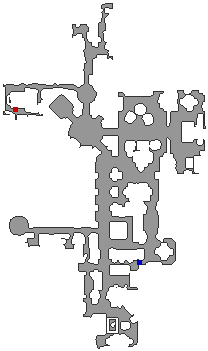

In [2]:
res

In [ ]:
YOLO COORDINATES RANGE: -62.324101 90.039901
YOLO MAP_RESOLUTION: (1250, 1250)
YOLO SOURCE POSITION REAL WORLD: 2.0708532333374023 0.7956106662750244
YOLO SOURCE POSITION GRID WORLD: 721 517
YOLO TARGET POSITION REAL WORLD: 10.323966026306152 4.899158477783203
YOLO TARGET POSITION: 653 551
YOLO PADDING: 2
    
COORDINATES RANGE: -62.324101 90.039901
MAP_RESOLUTION: 1250
SOURCE POSITION REAL WORLD: 0.5976877212524414 5.558842658996582
SOURCE POSITION GRID WORLD: 733 556
PADDING 4
TARGET POSITION REAL WORLD: 19.30671501159668 -9.629144668579102
TARGET POSITION: 580 432
    
    
    YOLO COORDINATES RANGE: -62.324101 90.039901
YOLO MAP_RESOLUTION: (1250, 1250)
YOLO SOURCE POSITION REAL WORLD: 10.69529914855957 7.605946063995361
YOLO SOURCE POSITION GRID WORLD: 650 573
YOLO TARGET POSITION REAL WORLD: 3.046595573425293 1.6201083660125732
YOLO TARGET POSITION: 713 524
YOLO PADDING: 2